#  Criando uma base de dados de uma escola de programação

## Criando lista com os nomes dos alunos

In [1]:
# Importando a biblioteca Pandas
import pandas as pd

### Utilizando a API do IBGE de nome, optanod pelo Ranking de Frequência:
https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking


In [2]:
# Lendo a API através do read_json. O final da api foi alterado para trazer apenas 20 nomes do sexo feminino
alunas = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f')
alunas.head(10)

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
5,JULIANA,0,562589,6,F
6,MARCIA,0,551855,7,F
7,FERNANDA,0,531607,8,F
8,PATRICIA,0,529446,9,F
9,ALINE,0,509869,10,F


In [3]:
# Lendo a API através do read_json. O final da api foi alterado para trazer apenas 20 nomes do sexo masculino
alunos = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m')
alunos.head(10)

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
5,PAULO,0,1417907,6,M
6,PEDRO,0,1213557,7,M
7,LUCAS,0,1116818,8,M
8,LUIZ,0,1102927,9,M
9,MARCOS,0,1101126,10,M


In [4]:
print('A quantidade de alunos da escola é: ' + str(len(alunas) + len(alunos)))

# para conseguir executar a concatenação das variáveis precisamos converter o numero inteiro para string

A quantidade de alunos da escola é: 400


### Criando um dataframe único

In [5]:
# Unificando as duas variáveis em uma lista
frames = [alunas, alunos]
frames

[          nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198    F
 198    ISADORA       0     81100   199    F
 199      NILZA       0     80128   200    F
 
 [200 rows x 5 columns],
           nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   19

In [6]:
# Utilizando a função do pandas Concat para concatenar esses dois frames, transformá-lo em um dataframe 
# e descartar as colunas que não nos interessa
nomes = pd.concat(frames)['nome'].to_frame()
nomes.sample(5)

,nome
31,JOSEFA
147,ALISSON
70,JOAQUIM
172,WANDERSON
6,MARCIA


In [7]:
# Pegando uma amostra 
nomes.sample(5)

,nome
139,OSMAR
107,VAGNER
99,DENISE
164,JAIRO
42,MARLENE


## Incluindo novas colunas no DF

### Incluindo nova coluna e criando ID randomicamente

In [8]:
# Importando a biblioteca Numpy
import numpy as np

In [9]:
# Gerando o ID do alunos de forma aleatória (pseudo aleatorio)
np.random.seed(123)

In [10]:
total_alunos = len(nomes)
total_alunos

400

In [11]:
# Criando uma nova coluna para o dataframe 'nomes' e atribuindo o id 
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1
nomes.head(10)

,nome,id_aluno
0,MARIA,235
1,ANA,43
2,FRANCISCA,304
3,ANTONIA,156
4,ADRIANA,343
5,JULIANA,310
6,MARCIA,55
7,FERNANDA,288
8,PATRICIA,379
9,ALINE,92


### Incluindo coluna de e-mail

In [12]:
# Criando domínios de e-mails
dominio = ['@dominiodoemail.com.br', '@servicodeemail.com.br']

In [13]:
# Criando a coluna dominio 
nomes['dominio'] = np.random.choice(dominio, total_alunos) # nesse caso não se quer um número aleatório, mas um elemento aleatorio da lista
nomes.head(5)

,nome,id_aluno,dominio
0,MARIA,235,@dominiodoemail.com.br
1,ANA,43,@servicodeemail.com.br
2,FRANCISCA,304,@servicodeemail.com.br
3,ANTONIA,156,@servicodeemail.com.br
4,ADRIANA,343,@servicodeemail.com.br


In [14]:
# Juntando o nome ao dominio para criar o email em uma nova coluna
nomes['e_mail'] = nomes['nome'].str.cat(nomes['dominio']).str.lower() # coluna nome concatenada com a coluna dominio e em letra minuscula
nomes.head(5)

,nome,id_aluno,dominio,e_mail
0,MARIA,235,@dominiodoemail.com.br,maria@dominiodoemail.com.br
1,ANA,43,@servicodeemail.com.br,ana@servicodeemail.com.br
2,FRANCISCA,304,@servicodeemail.com.br,francisca@servicodeemail.com.br
3,ANTONIA,156,@servicodeemail.com.br,antonia@servicodeemail.com.br
4,ADRIANA,343,@servicodeemail.com.br,adriana@servicodeemail.com.br


## Criando dataframe de Cursos

### Criando dataframe de Cursos lendo HTML

In [15]:
# Instalando bibliotecas com auxilio do pip install
!pip3 install html5lib
!pip3 install lxml 

In [16]:
# Importando biblioteca HTML para ler uma tabela dentro da pagina
import html5lib 

In [17]:
# Atribuindo o endereço da página a uma variável
url = 'http://tabela-cursos.herokuapp.com/index.html'

In [18]:
# Usando pandas para ler o html
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [19]:
# Convertendo a Lista Cursos em um Dataframe
cursos = cursos[0]

In [20]:
cursos.sample(5)

,Nome do curso
6,.NET para web
5,PHP com MySql
14,Análise de dados
4,Cursos de Python
15,Estatística básica


### Alterando o index de Cursos

In [21]:
# Renomeando as colunas
cursos = cursos.rename(columns={'Nome do curso' : 'nome_do_curso'})
cursos.sample(5)

,nome_do_curso
17,Programação funcional
16,Internet das coisas
15,Estatística básica
0,Lógica de programação
12,Persistência com .NET


In [22]:
# Criando ID dos cursos
cursos['id'] = cursos.index + 1
cursos.sample(5)

,nome_do_curso,id
12,Persistência com .NET,13
6,.NET para web,7
14,Análise de dados,15
13,Desenvolvendo jogos,14
8,TDD com Java,9


In [23]:
# Indicando o ID como index
cursos = cursos.set_index('id')

## Matriculando os alunos nos cursos

In [24]:
# Criando a quantidade de matriculas randomicamente. Utilizamos o metodo ceil e random para que cada aluna tenho pelo menos 1 matrículo
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)
nomes

,nome,id_aluno,dominio,e_mail,matriculas
0,MARIA,235,@dominiodoemail.com.br,maria@dominiodoemail.com.br,2
1,ANA,43,@servicodeemail.com.br,ana@servicodeemail.com.br,2
2,FRANCISCA,304,@servicodeemail.com.br,francisca@servicodeemail.com.br,2
3,ANTONIA,156,@servicodeemail.com.br,antonia@servicodeemail.com.br,1
4,ADRIANA,343,@servicodeemail.com.br,adriana@servicodeemail.com.br,3
...,...,...,...,...,...
195,WALTER,231,@dominiodoemail.com.br,walter@dominiodoemail.com.br,3
196,ARLINDO,99,@servicodeemail.com.br,arlindo@servicodeemail.com.br,1
197,MICHAEL,323,@dominiodoemail.com.br,michael@dominiodoemail.com.br,1
198,ALVARO,383,@servicodeemail.com.br,alvaro@servicodeemail.com.br,1


In [25]:
# Verificando o número maximo de matricula por aluno
max(nomes['matriculas'])

9

In [26]:
# Utilizando o describe para verificar melhor a esttistica da distribuição
nomes.matriculas.describe()

count    400.000000
mean       2.122500
std        1.497699
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: matriculas, dtype: float64

### Visualizando com a biblioteca Seaborn

In [27]:
# Importando biblioteca
import seaborn as sns

C:\Users\Natalia\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='matriculas', ylabel='Density'>

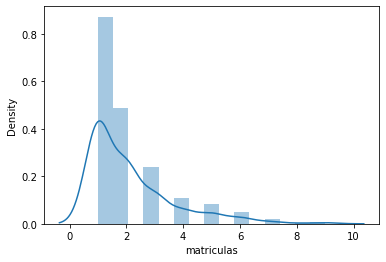

In [28]:
# Visualizando a distribuição atraves de um Histograma
sns.distplot(nomes.matriculas)

In [29]:
# Obtendo a distribuição quantitativa
nomes.matriculas.value_counts()

1    186
2    104
3     51
4     23
5     18
6     11
7      4
9      2
8      1
Name: matriculas, dtype: int64

### Selecionando os cursos

In [30]:
# Atribuindo os cursos de forma aleatoria com loop FOR

todas_matriculas = []
x = np.random.rand(20) # 20 é a quantidade de cursos que temos
probabilidade = x / sum(x)

for index, row in nomes.iterrows(): # iterrows verificará linha a linha
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        matcurso = [id, np.random.choice(cursos.index, p = probabilidade)]
        todas_matriculas.append(matcurso)
        
matriculas = pd.DataFrame(todas_matriculas, columns=['id_aluno', 'id_curso'])

In [31]:
matriculas.head(10)

,id_aluno,id_curso
0,235,14
1,235,7
2,43,8
3,43,8
4,304,8
5,304,9
6,156,6
7,343,8
8,343,7
9,343,9


In [32]:
# Contando a quantidade de alunos em cada curso
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno' : 'qntd_alunos'})
matriculas_por_curso

,qntd_alunos,nome_do_curso
id_curso,,
1,76,Lógica de programação
2,77,Java para Web
3,32,C# para Web
4,31,Ruby on Rails
5,78,Cursos de Python
6,33,PHP com MySql
7,56,.NET para web
8,44,Novas integrações com Java
9,26,TDD com Java


## Saídas em diferentes formatos

### Exportando para CSV

In [33]:
# exportando 
matriculas_por_curso.to_csv('matriculas_por_curso.csv', sep = ';', index=False)

### Transformando para Json

In [34]:
matriculas_json = matriculas_por_curso.to_json()

In [35]:
matriculas_json

'{"qntd_alunos":{"1":76,"2":77,"3":32,"4":31,"5":78,"6":33,"7":56,"8":44,"9":26,"10":7,"11":11,"12":66,"13":33,"14":91,"15":35,"16":26,"17":36,"18":29,"19":59,"20":3},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

### Transformando em HTML

In [36]:
matriculas_html = matriculas_por_curso.to_html()

In [37]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>qntd_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>76</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>77</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>32</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>31</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>78</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>33</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>56</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>44</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>26</td>
      <td

## Lendo e Escrevendo SQL

In [39]:
# instalando a biblioteca
!pip install sqlalchemy

In [40]:
from sqlalchemy import create_engine, MetaData, Table, inspect # adicionando o método inspect

engine = create_engine('sqlite:///:memory:')# aqui estamos dizendo que queremos que salve na memoria local
engine
type(engine)

matriculas_por_curso.to_sql('matriculas', engine)

inspector = inspect(engine) # criando um Inspector object
print(inspector.get_table_names()) # Exibindo as tabelas com o inspecto

['matriculas']


### Buscando no SQL

In [41]:
# Criando a query
query = 'select * from matriculas where qntd_alunos	 < 20'

In [42]:
pd.read_sql(query, engine)

,id_curso,qntd_alunos,nome_do_curso
0,10,7,Código limpo com C#
1,11,11,Preparatório para certificação Java
2,20,3,Orientação objetos com Java


In [44]:
# outra forma 
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'qntd_alunos'])

In [45]:
muitas_matriculas

,nome_do_curso,qntd_alunos
0,Lógica de programação,76
1,Java para Web,77
2,C# para Web,32
3,Ruby on Rails,31
4,Cursos de Python,78
5,PHP com MySql,33
6,.NET para web,56
7,Novas integrações com Java,44
8,TDD com Java,26
9,Código limpo com C#,7


In [47]:
# usando o pandas para manipular a busca
muitas_matriculas.query('qntd_alunos < 20')

,nome_do_curso,qntd_alunos
9,Código limpo com C#,7
10,Preparatório para certificação Java,11
19,Orientação objetos com Java,3


### Escrevendo no banco

In [51]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [52]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


<ipython-input-52-7f622051bbf8>:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  print(engine.table_names())


## Lendo e escrevendo em Excel

In [55]:
matriculas_por_curso

,qntd_alunos,nome_do_curso
id_curso,,
1,76,Lógica de programação
2,77,Java para Web
3,32,C# para Web
4,31,Ruby on Rails
5,78,Cursos de Python
6,33,PHP com MySql
7,56,.NET para web
8,44,Novas integrações com Java
9,26,TDD com Java


In [56]:
# Vendo quais alunos estão matriculados em um curso
id_curso = 15 # curso Análise de Dados
proxima_turma = matriculas.query('id_curso == {}'.format(id_curso))
proxima_turma

,id_aluno,id_curso
18,92,15
52,240,15
91,268,15
186,166,15
192,377,15
227,371,15
239,161,15
316,316,15
353,247,15
354,247,15


In [59]:
# Fazendo Join de duas tabelas
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,e_mail,matriculas
id_aluno,,,,,
2,15,CESAR,@dominiodoemail.com.br,cesar@dominiodoemail.com.br,2
3,15,VALDEMIR,@dominiodoemail.com.br,valdemir@dominiodoemail.com.br,2
11,15,PAULO,@dominiodoemail.com.br,paulo@dominiodoemail.com.br,4
15,15,VAGNER,@dominiodoemail.com.br,vagner@dominiodoemail.com.br,1
24,15,JOAO,@dominiodoemail.com.br,joao@dominiodoemail.com.br,2
67,15,PEDRO,@dominiodoemail.com.br,pedro@dominiodoemail.com.br,5
92,15,ALINE,@servicodeemail.com.br,aline@servicodeemail.com.br,2
109,15,KELLY,@servicodeemail.com.br,kelly@servicodeemail.com.br,8
110,15,OSVALDO,@servicodeemail.com.br,osvaldo@servicodeemail.com.br,5


In [60]:
# Fazendo Join de duas tabelas
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
2          CESAR
3       VALDEMIR
11         PAULO
15        VAGNER
24          JOAO
67         PEDRO
92         ALINE
109        KELLY
110      OSVALDO
136        JAIRO
138      MARCELO
161      TATIANA
166       ROSANA
167        LIDIA
208         LUIZ
214        JAIME
219      GABRIEL
227       ROSANE
230       CARLOS
240        LUANA
247       RAIANE
247       RAIANE
256       RUBENS
260      VICENTE
268      MARLENE
314      GERALDA
316    FRANCIELE
319         INES
359      ARNALDO
359      ARNALDO
361       NILSON
371       MILENA
377      VALERIA
395     MAURICIO
398     CRISTIAN
Name: nome, dtype: object

In [61]:
# Fazendo Join de duas tabelas
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
2,CESAR
3,VALDEMIR
11,PAULO
15,VAGNER
24,JOAO
67,PEDRO
92,ALINE
109,KELLY
110,OSVALDO


In [71]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Análise de dados
Name: 15, dtype: object

In [72]:
nome_do_curso = nome_curso.nome_do_curso
nome_do_curso

'Análise de dados'

In [73]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [75]:
proxima_turma = proxima_turma.rename(columns={'nome' : 'Alunos do curso de {}'.format(nome_do_curso)})

In [76]:
proxima_turma

,Alunos do curso de Análise de dados
id_aluno,
2,CESAR
3,VALDEMIR
11,PAULO
15,VAGNER
24,JOAO
67,PEDRO
92,ALINE
109,KELLY
110,OSVALDO


## Salvando em Excel

In [77]:
proxima_turma.to_excel('proxima_turma.xlsx', index=True)